# Выявление закономерностей, определяющих успешность игр

# Описание данных

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файла с данными

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import csv
import seaborn as sns
import scipy
from scipy.stats import levene
from collections import Counter

In [3]:

data = pd.read_csv('/datasets/games.csv', delimiter=',')

display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовка данных 

### Приведение названия столбцов к нижнему регистру

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.columns = map(str.lower, data.columns)

In [7]:
display(data.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Преобразование данных в соответствующие типы

Предварительно проверим уникальные значения параметров

In [8]:
for i in data.columns:
    print(data[i].unique())
#print(data.unique())
#data.info()

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.

 Оценку пользователей перевeдём в последующем во float

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
# смотрим пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

for i in data.columns:   
    print(data[i].unique())

# tbd видимо связано с последующим редактирование базы данных, заменим их на np.nan
data.loc[data.user_score=='tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype(float)
df = data.groupby(['genre','year_of_release'])['critic_score'].transform('median')
print(df)

data['critic_score'] = data['critic_score'].fillna(df)
for i in data.columns:
    print(data[i].unique())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обработка пропусков

In [12]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 40%
rating - 40%


Пропуски по параметрам

 name

In [13]:
data[data['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Есть две игры без имени, жанра, оценок пользователей, критиков, рейтинга. Вряд ли именно эти две игры помогут как-то решить поставленную задачу. Поэтому удалю данные строки из набора данных.

In [14]:
#data = data[data['name'].isna()==False].copy()
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

Пропусков нет

year_of_release

In [15]:
data[data['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удаляю данные записи, так как восстановить год игры по косвенным признакам не получится, тем более их всего 2%.

In [16]:
#data = data[data['year_of_release'].isna()==False].copy()
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

Пропусков нет

na_sales, eu_sales, jp_sales, other_sales

In [17]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   na_sales     16444 non-null  float64
 1   eu_sales     16444 non-null  float64
 2   jp_sales     16444 non-null  float64
 3   other_sales  16444 non-null  float64
dtypes: float64(4)
memory usage: 642.3 KB


In [18]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Пропусков нет

А вот с распределением данных явно что-то не так. Средние значения всех метрик очень сильно отличаются от максимальных значений. Попробую разобраться в чем причина такого разброса. Посмотрим распределение данных

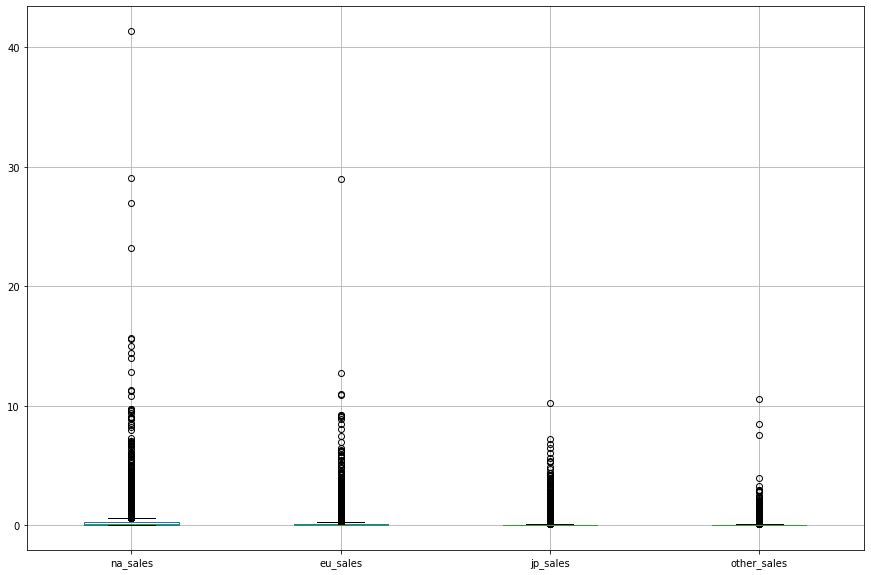

In [19]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].boxplot(figsize=(15,10));

Видно, что в каждом регионе продаж есть супер-лидеры которые выглядят как аномалия, но их немного.Но, возможно, это просто супер успешные игры. 
Возможно, что стоит разделить весь набор данных на две части и проводить отдельный анализ супер-лидеров от других игр. Возможно, что и не стоит так делать. Пока есть ощущения, что эти супер-продажи могут сильно повлиять на итоговый результат если их никак не корректировать. Но я решил, на данном этапе, оставить данные как есть. Возможно далее я и сделаю какую-то разбивку. Буду смотреть по ситуации.

Суммарные продажи во всех регионах

In [19]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data_sales=data

critic_score

In [20]:
data[data['critic_score'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [21]:

data['critic_score'].isna().sum()

8461

In [22]:
data['critic_score'].isna().mean().round(3)

0.515

Так как показатель типа рейтинг является качественной переменной( порядковой), то пропущенные значения в ячейке "оценка критиков" я буду заменять на -1 (группа для пропущенных значений).

In [23]:
#data = data[data['critic_score'].isna()==False].copy()
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'].isna().sum()

0

Пропусков нет

user_score

In [24]:
data[data['user_score'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN,0.01


In [25]:

data['user_score'].isna().sum()

6605

In [26]:
data['user_score'].isna().mean().round(3)

0.402

Больше 54% пропусков это конечно очень много. Возможно, что их можно обработать и заполнить медианными значениями в зависимости от года выпуска, жанра и платформы. Но есть риск, что потом эти медианные значения не позволят правильно интерпретировать данные. Поэтому пока не буду никак обрабатывать и пытаться заполнить пропуски. Заменю их на -1.

In [27]:
#data['user_score'].fillna(0, inplace=True)
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'].isna().sum()

6605

Пропусков нет

<div class="alert-warning">
<b>Комментарий ревьюера V2 ⚠️</b>

Ты же заменил пропуски на заглушку опять в столбце `critic_score`, а нужно было в `user_score`.</div>

Тип данных у переменной user_score - object. Причина в том, что среди оценок пользователей встречается текст tbd.Аббревиатура означает, в IT это обычно To Be Determined. Получается, что играм с такой отметкой пользователи еще не поставили свою оценку. Поэтому буду считать, что у данной игры пользовательская оценка равна нулю. Сделаю соответствующую замену и переведу данные в тип float

In [28]:
len(data[data['user_score']=='tbd'])

2376

In [29]:
data.loc[(data['user_score']=='tbd'), 'user_score'] = 0
data['user_score'] = data['user_score'].fillna(0)

<div class="alert-warning">
<b>Комментарий ревьюера V2 ⚠️</b>

Замена пропусков на 0 возможна, опять же если 0 потом отфильтровывать в дальнейших расчетах, однако имеет смысл придерживаться единообразия.</div>

In [30]:
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


rating

In [31]:
data[data['rating'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,0.0,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,0.0,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,0.0,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,0.0,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,0.0,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,0.0,NaN,0.01


In [32]:

data['rating'].isna().sum()

6676

In [33]:
data['rating'].isna().mean().round(3)

0.406

В данном случае придется оставить пропуски без какой-то особой обработки. В данном случае нет идей как можно заполнить данные значения. Заменю их на 0.

In [34]:
#data['rating'].fillna(-1, inplace=True)
data['rating'] = data['rating'].fillna(0)
data['year_of_release'].isna().sum()

0

Пропусков нет

In [35]:
display(data.head(20))
display(data_sales.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,0.0,0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,0.0,0,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,0.0,0,28.31


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,0.0,0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,0.0,0,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,0.0,0,28.31


In [36]:

display(data.isna().mean())

data.dtypes

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
all_sales          0.0
dtype: float64

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
all_sales          float64
dtype: object

In [37]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
all_sales          0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


## 3 Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

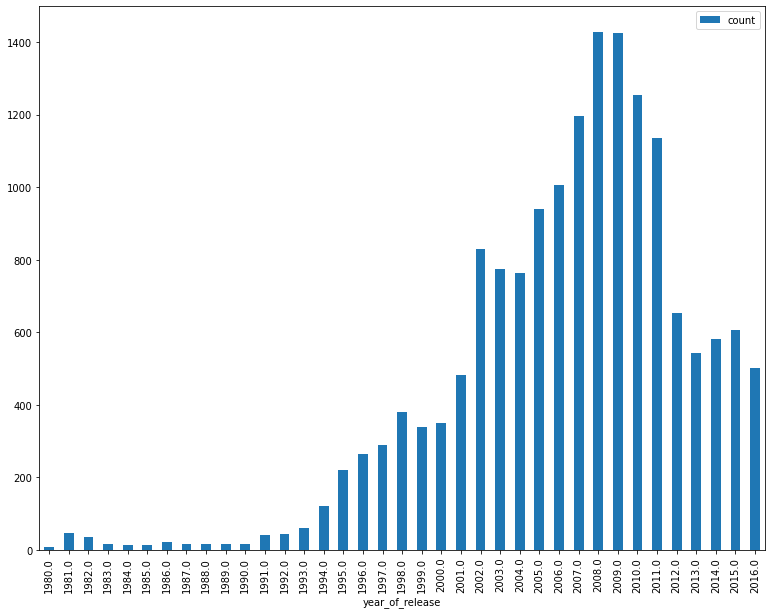

In [39]:
import matplotlib.pyplot as plt
data.pivot_table(index="year_of_release", values="platform", aggfunc='count').plot(kind="bar",label='count',figsize=(13,10))
plt.legend(["count"])

По значениям в разные годы определяем тренд продаж. Актуальным кажется период после большого спада к 2012 году, т.е. период с 2012 по 2016 годы.  

### Продажи по платформам

In [40]:
#Определяем суммарные продажи по платформам

data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

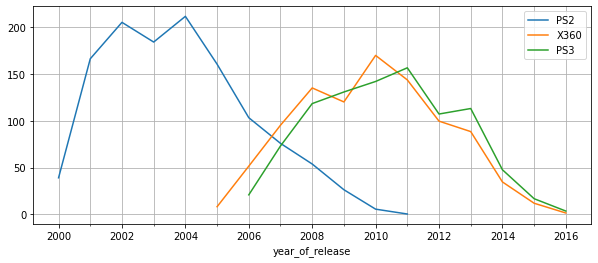

In [41]:
#display(data.head(20))
df = data[data['platform']=='PS2'].groupby('year_of_release')['all_sales'].sum()
ax = df.plot(grid=True, figsize=(10,4))
df = data[data['platform']=='X360'].groupby('year_of_release')['all_sales'].sum()
ax = df.plot(grid=True, figsize=(10,4))
df = data[data['platform']=='PS3'].groupby('year_of_release')['all_sales'].sum()
ax = df.plot(grid=True, figsize=(10,4))

xtick=range(2000,2016)
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')
import matplotlib.pyplot as plt
plt.legend(['PS2','X360','PS3'])

Чтобы выбрать ТОП платформ использую 75% квантиль. Лидеры должны быть лидерами и должны показывать продажи лучше чем все в среднем.

In [42]:
years_total_sales = (data
                   .pivot_table(index=['platform', 'year_of_release'], aggfunc={'all_sales':'sum'})
                   .reset_index()
                  )
print(years_total_sales)

    platform  year_of_release  all_sales
0       2600           1980.0      11.38
1       2600           1981.0      35.68
2       2600           1982.0      28.88
3       2600           1983.0       5.84
4       2600           1984.0       0.27
..       ...              ...        ...
233       XB           2008.0       0.18
234     XOne           2013.0      18.96
235     XOne           2014.0      54.07
236     XOne           2015.0      60.14
237     XOne           2016.0      26.15

[238 rows x 3 columns]


In [43]:
platforms_top = (years_total_sales
         .pivot_table(index=['platform'], aggfunc={'all_sales':'sum'})
         .reset_index()
         .sort_values(by='all_sales', ascending=False)
        )
platforms_top

,platform,all_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [44]:
q = platforms_top['all_sales'].quantile(0.75)
print(platforms_top['all_sales'])
print(q)
platforms_top = platforms_top.head(6)
#[platforms_top['all_sales'] >= q].copy()

platforms_top_name = list(platforms_top['platform'].unique())
print(platforms_top_name)

16    1233.56
28     961.24
17     931.34
26     891.18
4      802.78
15     727.58
18     314.14
6      312.88
19     289.53
2      257.81
13     255.76
5      254.43
29     251.57
11     251.05
10     218.01
23     200.04
7      196.73
30     159.32
0       86.48
27      82.19
20      53.81
21      33.59
8       28.35
3       15.95
22       1.86
12       1.44
25       1.42
24       0.16
1        0.10
9        0.04
14       0.03
Name: all_sales, dtype: float64
301.20500000000015
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


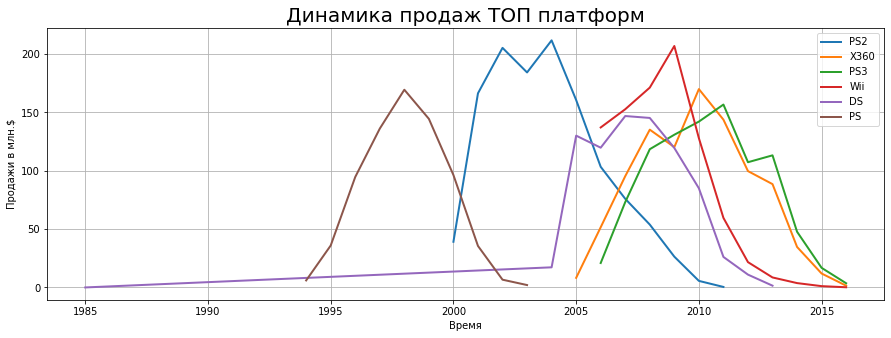

In [45]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# Строю графики в цикле
for i in platforms_top_name:
    x = years_total_sales[years_total_sales['platform']==i]['year_of_release']
    y = years_total_sales[years_total_sales['platform']==i]['all_sales']

    line = ax.plot(x, y, '-', linewidth=2, label=i)

# Улучшения графика    
ax.set_title('Динамика продаж ТОП платформ', size=20)
ax.set_xlabel('Время')
ax.set_ylabel('Продажи в млн.$')
ax.legend()
ax.grid(True)
    # Устанавливаю шаг для делений на оси и меняю их формат
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    # for label in ax.get_xticklabels():
    #     label.set_rotation(90)
    #     label.set_fontsize(15)

plt.show();

Из распределениям по годам платформ с наибольшими суммарными продажами определяем жизненный цикл платформ - 10 лет.

### Актуальный период 

Актуальный период должен быть равен жизненному циклу, но для прогноза достаточно взять за 3 предыдущих года 2014, 2015 и 2016 годы для прогноза на 2017 год, чтобы определить объем продаж и направление тренда.

In [46]:
target_year = data[(data['year_of_release']>=2014) & (data['year_of_release']<=2016)]
target_year_10 = data[(data['year_of_release']>=2007) & (data['year_of_release']<=2016)]
table = target_year.pivot_table(index=['platform', 'year_of_release'], aggfunc={'all_sales':'sum'}).reset_index()
table.head(100)

,platform,year_of_release,all_sales
0,3DS,2014.0,43.76
1,3DS,2015.0,27.78
2,3DS,2016.0,15.14
3,PC,2014.0,13.28
4,PC,2015.0,8.52
5,PC,2016.0,5.25
6,PS3,2014.0,47.76
7,PS3,2015.0,16.82
8,PS3,2016.0,3.60
9,PS4,2014.0,100.00


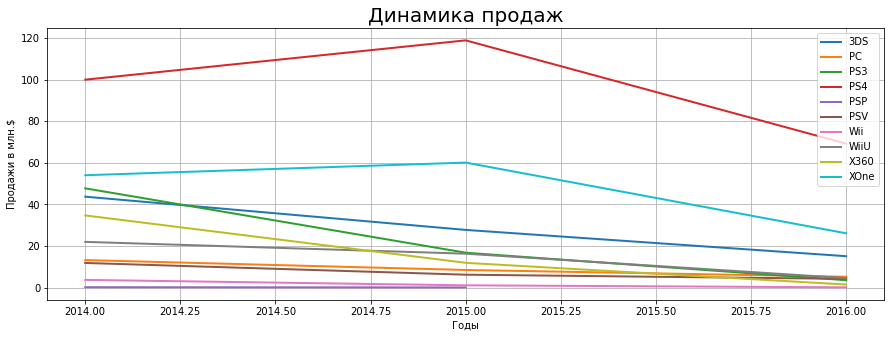

In [47]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# Строю графики в цикле
for i in list(table['platform'].unique()):
    x = table[table['platform']==i]['year_of_release']
    y = table[table['platform']==i]['all_sales']

    line = ax.plot(x, y, '-', linewidth=2, label=i)

# Улучшения графика    
ax.set_title('Динамика продаж', size=20)
ax.set_xlabel('Годы')
ax.set_ylabel('Продажи в млн.$')
ax.legend()
ax.grid(True)
    # Устанавливаю шаг для делений на оси и меняю их формат
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    # for label in ax.get_xticklabels():
    #     label.set_rotation(90)
    #     label.set_fontsize(15)

plt.show();

In [48]:
#data_2007_2016 = data.query("year_of_release == [2007,2016]")
data_2016 = data.query("year_of_release == 2016")
data_2015 = data.query("year_of_release == 2015")

In [49]:
#display(data_2007_2016.tail(200))

Лидируют по продажам

In [50]:
target_year = data[(data['year_of_release']>=2014) & (data['year_of_release']<=2016)]
target_year.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
#display(data_2016)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: all_sales, dtype: float64

In [51]:
# лидеры продаж за 2014-2016 годы

data_2016.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: all_sales, dtype: float64

In [52]:
# лидеры продаж за 2015 год

data_2015.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: all_sales, dtype: float64

In [53]:
# определяем тренд продаж - растут или падают

df=data_2016.groupby('platform')['all_sales'].sum()-data_2015.groupby('platform')['all_sales'].sum()

In [54]:
print(df)

platform
3DS    -12.64
PC      -3.27
PS3    -13.22
PS4    -49.65
PSP       NaN
PSV     -2.00
Wii     -0.96
WiiU   -11.75
X360   -10.44
XOne   -33.99
Name: all_sales, dtype: float64


### Ящик с усами

Ящик с усами

In [55]:
actual_platforms = ["PS4", "WiiU", "XOne", "PC", "3DS", "PS3" , "X360"]
df_actual = data.query('year_of_release >= 2014') 

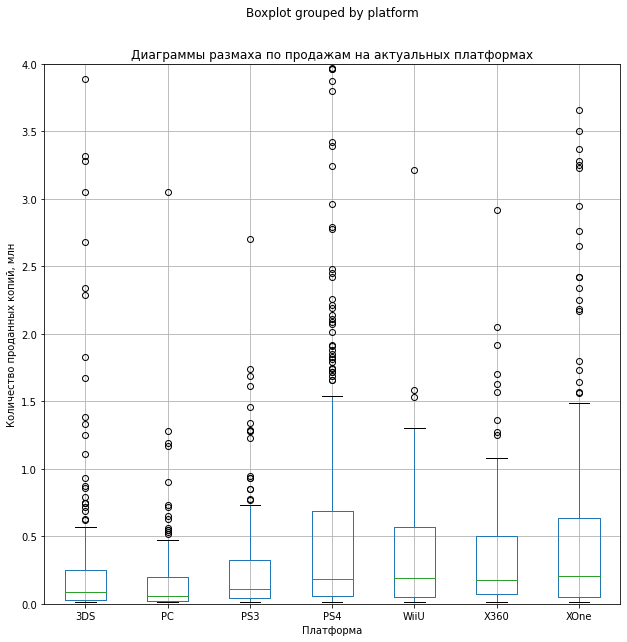

In [56]:
(df_actual.query('platform in @actual_platforms')[['platform', 'name', 'all_sales']]
 .boxplot(column='all_sales', by='platform', figsize=(10,10))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

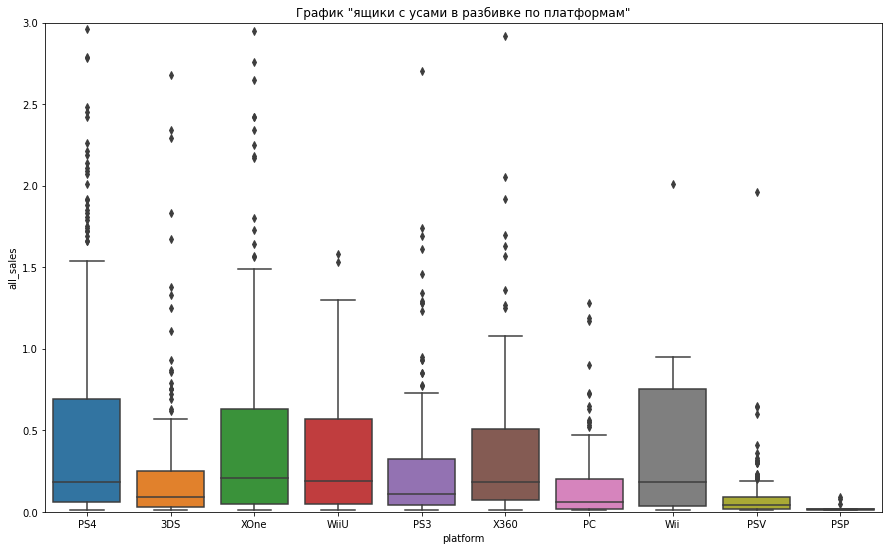

In [96]:
#Код ревьюера
plt.figure(figsize= (15, 9))
sns.boxplot(x = df_actual['platform'], y = df_actual['all_sales'])
plt.title('График "ящики с усами в разбивке по платформам"')
plt.ylim(0, 3)
plt.show()

В лидерах PS4, XOne 

In [57]:
display(data_2016.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,-1.0,0.0,0,7.14
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


<AxesSubplot:>

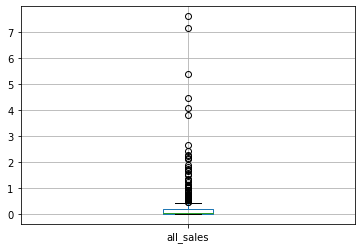

In [58]:
data_2016.query("year_of_release == 2016").boxplot('all_sales')

<AxesSubplot:>

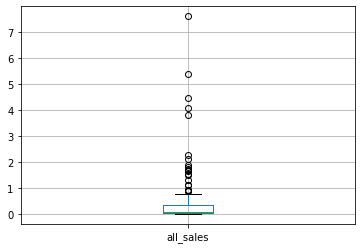

In [59]:
data_2016.query('platform=="PS4"').boxplot('all_sales')

<AxesSubplot:>

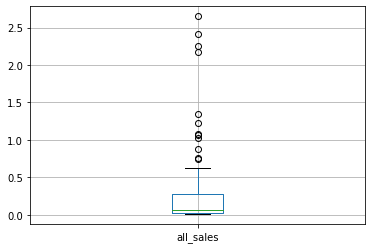

In [60]:
data_2016.query('platform=="XOne"').boxplot('all_sales')

Видно, что основная часть 75% продаж до чуть более 0,5 млн, и отдельные выше 

### Влияние отзывов на продажи на популярной платформе PS4

#### влияние отзывов критиков

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

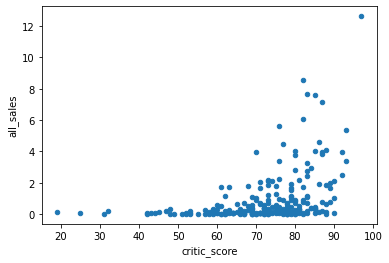

In [61]:
target_year.query('platform=="PS4" & critic_score > 0').sort_values('critic_score').plot(x='critic_score', y='all_sales', kind='scatter') 

по scatter наблюдаем прямую зависимость продаж и оценки критиков

#### влияние отзывов пользователей

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

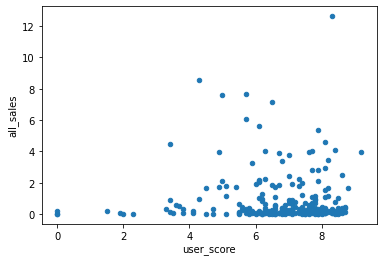

In [62]:
target_year.query('platform=="PS4" & critic_score > 0').sort_values('user_score').plot(x='user_score', y='all_sales', kind='scatter') 

здесь наблюдаем прямую зависимость несколько слабее

#### вычисление корреляции

In [63]:

target_year.query('platform=="PS4" & critic_score > 0')['all_sales']\
    .corr(target_year.query('platform=="PS4" & critic_score > 0')['critic_score'])

0.40266141068104083

In [64]:

target_year.query('platform=="PS4" & user_score > 0')['all_sales']\
    .corr(target_year.query('platform=="PS4" & user_score > 0')['user_score'])

-0.040131589472697356

выводы по корреляции не определены, но прямая зависимость продаж и оценки критиков прослеживается.

### Влияние отзывов на продажи на других платформах

влияние отзывов критиков

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

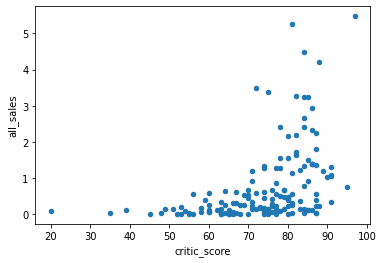

In [65]:
target_year.query('platform=="XOne" & critic_score > 0').sort_values('critic_score').plot(x='critic_score', y='all_sales', kind='scatter') 

прослеживается пямая зависимость продаж и оценки критиков

влияние отзывов пользователей

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

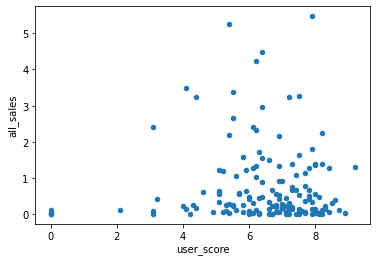

In [66]:
target_year.query('platform=="XOne" & critic_score > 0').sort_values('user_score').plot(x='user_score', y='all_sales', kind='scatter') 

зависимость продаж и оценки пользователей не прослеживается

вычисление корреляции

In [67]:
print(data.query('platform=="XOne" & critic_score > 0')['all_sales'].corr(data_2016['critic_score']))

0.4120052543168866


In [68]:
print(data.query('platform=="XOne" & critic_score > 0')['all_sales'].corr(data_2016['user_score']))

-0.07100336801456518


Здесь зависимость продаж и оценки критиков по корреляции не прослеживается.

target_year.query('platform=="PSV"').sort_values('critic_score').plot(x='critic_score', y='all_sales', kind='scatter') 

влияние отзывов пользователей

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

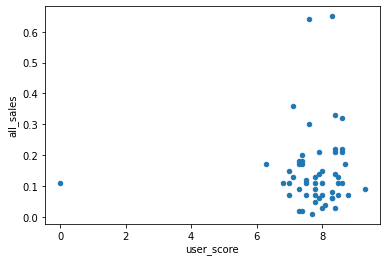

In [69]:
target_year.query('platform=="PSV" & critic_score > 0').sort_values('user_score').plot(x='user_score', y='all_sales', kind='scatter') 

Здесь зависимость продаж и оценки критиков не прослеживается.

вычисление корреляции

In [70]:
print(target_year.query('platform=="PSV" & critic_score > 0')['all_sales'].corr(target_year['critic_score']))

0.04266490657009526


In [71]:
print(target_year.query('platform=="PSV" & critic_score > 0')['all_sales'].corr(target_year['user_score']))

0.0486280162791486


In [99]:

target_year.query('platform=="PSV" & user_score > 0')['all_sales']\
    .corr(target_year.query('platform=="PSV" & user_score > 0')['user_score'])

-0.16845504978064446

Выводы по зависимости на других платформах не определены

In [72]:
target_year.query('platform=="PS4" & critic_score > 0')['all_sales']\
    .corr(target_year.query('platform=="PS4" & critic_score > 0')['critic_score'])

0.40266141068104083

### Распределение игр по жанрам 

In [73]:
target_year.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: all_sales, dtype: float64

In [74]:
target_year.groupby('genre')['all_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: all_sales, dtype: float64

In [75]:
target_year.groupby('genre')['critic_score'].median().sort_values(ascending=False)

genre
Platform        73.5
Shooter         72.0
Racing          65.0
Fighting        51.0
Sports          31.0
Simulation      21.0
Action          -1.0
Adventure       -1.0
Misc            -1.0
Puzzle          -1.0
Role-Playing    -1.0
Strategy        -1.0
Name: critic_score, dtype: float64

In [76]:
target_year.groupby('genre')['user_score'].median().sort_values(ascending=False)


genre
Shooter         6.40
Platform        6.05
Fighting        5.80
Racing          5.80
Sports          4.50
Simulation      3.95
Action          0.00
Adventure       0.00
Misc            0.00
Puzzle          0.00
Role-Playing    0.00
Strategy        0.00
Name: user_score, dtype: float64

 Лидеры по жанрам:

Shooter и Platform       

Жанры с высокими медианными продажами и оценкой критиков в лидерах

Самые прибыльные жанры в актуальный период:
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44

## Портрет пользователя по регионам

### Самые популярные платформы

In [77]:
region = (target_year
          .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc='sum')
          .reset_index()
         )
region

,platform,eu_sales,jp_sales,na_sales,other_sales
0,3DS,16.12,44.24,22.64,3.68
1,PC,17.97,0.00,7.23,1.85
2,PS3,25.54,11.22,22.05,9.37
3,PS4,130.04,15.02,98.61,44.48
4,PSP,0.00,0.36,0.00,0.00
5,PSV,3.53,14.54,2.52,1.81
6,Wii,2.59,0.00,2.08,0.40
7,WiiU,13.15,7.31,19.36,3.16
8,X360,15.49,0.08,28.30,4.35
9,XOne,46.25,0.32,81.27,12.52


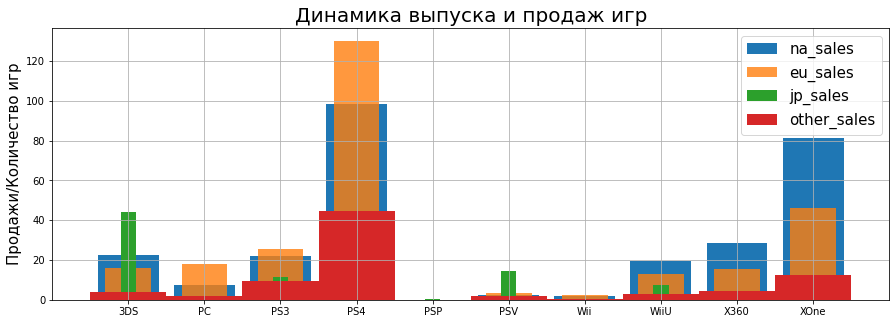

In [78]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# Переменные 
x = list(region['platform'])
y1 = region['na_sales']
y2 = region['eu_sales']
y3 = region['jp_sales']
y4 = region['other_sales']

# Графики
ax.bar(x, y1, 0.8, alpha=1, label='na_sales')
ax.bar(x, y2, 0.6, alpha=0.8, label='eu_sales')
ax.bar(x, y3, 0.2, alpha=1, label='jp_sales')
ax.bar(x, y4, 1.0, alpha=1, label='other_sales')

# Улучшения  
ax.set_title('Динамика выпуска и продаж игр', size=20)
ax.set_ylabel('Продажи/Количество игр', size=15)
ax.grid()
ax.legend(fontsize=15)

plt.show();


Можно уверенно утверждать, что популярность платформ в разных регионах отличается

ТОП5 платформ по регионам

In [79]:
# Северная Америка
na_all = target_year['na_sales'].sum()
print(na_all)
na_platform = target_year.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
na_rez = na_platform/na_all
print(na_rez.head())


284.06000000000006
platform
PS4     0.347145
XOne    0.286102
X360    0.099627
3DS     0.079701
PS3     0.077624
Name: na_sales, dtype: float64


In [80]:
# Европа
eu_all = target_year['eu_sales'].sum()
print(eu_all)
eu_platform = target_year.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
eu_rez = eu_platform/eu_all
print(eu_rez.head())


270.67999999999995
platform
PS4     0.480420
XOne    0.170866
PS3     0.094355
PC      0.066388
3DS     0.059554
Name: eu_sales, dtype: float64


In [81]:
# Япония
jp_all = target_year['jp_sales'].sum()
print(jp_all)
jp_platform = target_year.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
jp_rez = jp_platform/jp_all
print(jp_rez.head())


93.09
platform
3DS     0.475239
PS4     0.161349
PSV     0.156193
PS3     0.120529
WiiU    0.078526
Name: jp_sales, dtype: float64


In [82]:
# Другие страны
other_all = target_year['other_sales'].sum()
print(other_all)
other_platform = target_year.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head()
other_rez = other_platform/other_all
print(other_rez.head())


81.62
platform
PS4     0.544964
XOne    0.153394
PS3     0.114800
X360    0.053296
3DS     0.045087
Name: other_sales, dtype: float64


списки самых популярных платформ и их доли различаются для разных регионов.

### Самые популярные жанры 

In [83]:
# Северная Америка
na_all = target_year['na_sales'].sum()
#print(na_all)
na_genre = target_year.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
na_rez = na_genre/na_all
print(na_rez.head())


genre
Shooter         0.278181
Action          0.255333
Sports          0.162395
Role-Playing    0.117827
Misc            0.052982
Name: na_sales, dtype: float64


In [84]:
# Европа
eu_all = target_year['eu_sales'].sum()
print(eu_all)
eu_genre = target_year.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
eu_rez = eu_genre/eu_all
print(eu_rez.head())


270.67999999999995
genre
Action          0.275898
Shooter         0.242057
Sports          0.168945
Role-Playing    0.104071
Racing          0.052202
Name: eu_sales, dtype: float64


In [85]:
# Япония
jp_all = target_year['jp_sales'].sum()
print(jp_all)
jp_genre = target_year.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
jp_rez = jp_genre/jp_all
print(jp_rez.head())


93.09
genre
Role-Playing    0.334730
Action          0.317757
Fighting        0.068428
Misc            0.060264
Shooter         0.052315
Name: jp_sales, dtype: float64


In [86]:
# Другие страны
other_all = target_year['other_sales'].sum()
print(other_all)
other_genre =target_year.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head()
other_rez = other_genre/other_all
print(other_rez.head())


81.62
genre
Action          0.276525
Shooter         0.263783
Sports          0.175937
Role-Playing    0.105856
Misc            0.049375
Name: other_sales, dtype: float64


Списки самых популярных жанров похожи у Северной Америки, Европы и других странах. 
Список  самых популярных жанров Японии отличается от прочих списков. Ощущается разница менталитетов.

### Влияние рейтинга ESRB

In [87]:
#data['rating'] = data['rating'].fillna('')

In [88]:
rating = (target_year
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc='sum')
          .reset_index()
         )
rating

,rating,eu_sales,jp_sales,na_sales,other_sales
0,0,58.95,56.90,64.72,18.40
1,E,58.06,8.94,50.74,15.39
2,E10+,26.16,4.46,33.23,7.83
3,M,93.44,8.01,96.42,28.67
4,T,34.07,14.78,38.95,11.33


,na_sales
rating,
0,64.72
E,50.74
E10+,33.23
M,96.42
T,38.95


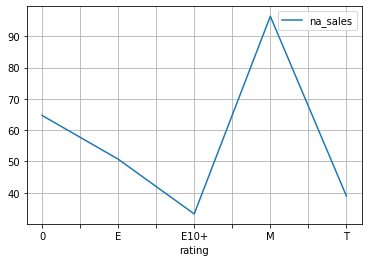

In [89]:

target_year.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(grid=True)
target_year.pivot_table(index='rating', values='na_sales', aggfunc='sum')

,eu_sales
rating,
0,58.95
E,58.06
E10+,26.16
M,93.44
T,34.07


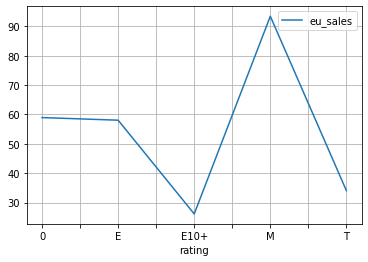

In [90]:
target_year.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(grid=True)
target_year.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

,jp_sales
rating,
0,56.90
E,8.94
E10+,4.46
M,8.01
T,14.78


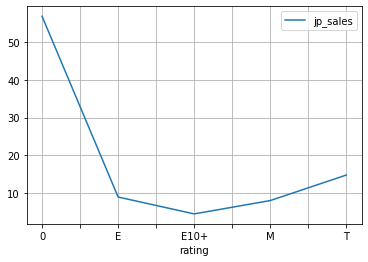

In [91]:
target_year.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(grid=True)
target_year.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

,other_sales
rating,
0,18.40
E,15.39
E10+,7.83
M,28.67
T,11.33


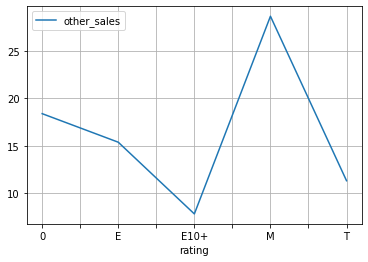

In [92]:
target_year.pivot_table(index='rating', values='other_sales', aggfunc='sum').plot(grid=True)
target_year.pivot_table(index='rating', values='other_sales', aggfunc='sum')

Как видно из графиков рейтинги ESRB для разных регионов разные как по объемам для всех регионов, 
так и по виду графиков для Японии от остальных.

Можно сделать следующие выводы.

Северная Америка. Самая продаваемая платформа PS4, доля продаж 0.347145. Самый популярный жанр - Shooter, доля продаж - 0.278181.  Самый высокий рейтинг - М: 96.42. 
Европа. Самая продаваемая платформа PS4, доля продаж 0.480420. Самый популярный жанр - Action, доля продаж - 0.275898.  Самый высокий рейтинг - M:	93.44. 
Япония. Самая продаваемая платформа 3DS, доля продаж 0.475239. Самый популярный жанр - Role-Playing, доля продаж - 0.334730.  Самый высокий рейтинг - T:	14.78. 
Другие страны. Самая продаваемая платформа PS4, доля продаж 0.544964. Самый популярный жанр - Action, доля продаж - 0.276525.  Самый высокий рейтинг - M: 28.67.

В рамках работы по данному блоку было сделано сделано следующее:

выявлены самые популярные платформы (ТОП5) в зависимости от региона продаж
выявлены самые популярные жанры (ТОП5) в зависимости от региона продаж
выявлены самые популярные игровые рейтинги (по продажам) в зависимости от региона продаж.

## Проверка гипотез

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформ PC.
H_1: Средние пользовательские рейтинги платформ Xbox One != Средние пользовательские рейтинги платформ PC.
alpha = 0.05

In [93]:
from scipy import stats as st
import numpy as np

alpha = 0.05

target_year_3 = data[(data['year_of_release']>=2014) & (data['year_of_release']<=2016)]

data_tmp = target_year_10[target_year_10['user_score'].notnull()]

result = st.ttest_ind(
    data_tmp[data_tmp['platform']=='XOne']['user_score'],
    data_tmp[data_tmp['platform']=='PC']['user_score'],
    equal_var=False)
print(result.pvalue)

if  result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")









0.02083455127372652
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу: H_1: Средние пользовательские рейтинги платформ Xbox One != Средние пользовательские рейтинги платформ PC. alpha = 0.05

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports.
H_1: Средние пользовательские рейтинги жанров Action != Средние пользовательские рейтинги жанров Sports.
alpha = 0.05

In [94]:
from scipy import stats as st
import numpy as np

alpha = 0.05

target_year_3 = data[(data['year_of_release']>=2014) & (data['year_of_release']<=2016)]
#print(target_year_10)
data_tmp = target_year_10[target_year_10['user_score'].notnull()]

result = st.ttest_ind(
    data_tmp[data_tmp['genre']=='Action']['user_score'],
    data_tmp[data_tmp['genre']=='Sports']['user_score'],
    equal_var=False)
print(result.pvalue)

if  result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")









0.00019396422427015982
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action != Средние пользовательские рейтинги жанров Sports.

Проверяю гипотезу с помощью scipy.stats.ttest_ind, так как с его помощью можно сравнить средние двух совокупностей.

## Общий вывод

Жизненный цикл платформ составляет 10 лет. 

Наибольших продаж за исследуемый период с 1980 по 2016 годы достигли 
PS2, X360, PS3, Wii, DS, PS,.

В конце 2016 максимально привлекательными выглядят следующие платформы игры на консоли: 
PS4, XOne, 3DS.

Актуальный период должен быть равен жизненному циклу, но для прогноза достаточно взять 
за 2 предыдущих года 2015 и 2016 годы для прогноза на 2017 год, чтобы определить объем 
продаж и направление тренда.

Основная часть 75% продаж до размера чуть более 0,5 млн, и отдельные продажи - выше. 

Наблюдается прямая зависимость продаж и оценки критиков на популярной платформе PS4 .

Несколько слабее наблюдаеся прямая зависимость продаж и оценки пользователей на 
популярной платформе PS4 .

Выводы по зависимости на других платформах не определены.

Лидеры по жанрам: Action, Sports, Shooter.

Жанры с высокими и низкими продажами выделяются по медианным значениям продаж, по 
оценкам критиков и пользователей особой разницы не наблюдается.

Списки самых популярных платформ и их доли различаются для разных регионов.
Северная Америка: X360, PS2, Wii, PS3, DS.


Списки самых популярных жанров похожи у Северной Америки, Европы и других странах. 
Список  самых популярных жанров Японии отличается от прочих списков. 
Ощущается разница менталитетов.

Рейтинги ESRB для разных регионов разные, как по объемам для всех регионов, 
так и для Японии по виду распределения от остальных.

Проверка гипотез осуществлялась с помощью scipy.stats.ttest_ind, так как с его помощью 
можно сравнить средние двух совокупностей.

В качетве рекомендаций при планировании рекламных кампаний следует учитывать:
- тренды продаж;

- региональные предпочтения по платформам и жанрам:
Северная Америка. Самая продаваемая платформа PS4, доля продаж 0.347145. Самый популярный жанр - Shooter, доля продаж - 0.278181. Самый высокий рейтинг - М: 96.42. Европа. Самая продаваемая платформа PS4, доля продаж 0.480420. Самый популярный жанр - Action, доля продаж - 0.275898. Самый высокий рейтинг - M: 93.44. Япония. Самая продаваемая платформа 3DS, доля продаж 0.475239. Самый популярный жанр - Role-Playing, доля продаж - 0.334730. Самый высокий рейтинг - T: 14.78. Другие страны. Самая продаваемая платформа PS4, доля продаж 0.544964. Самый популярный жанр - Action, доля продаж - 0.276525. Самый высокий рейтинг - M: 28.67.

- оценку критиков.



